## Kaggle Digit Recognizer using PCA and Stochastic Gradient Descent

## 1. Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

raw_data = open("train.csv",'rt')
data = np.loadtxt(raw_data, delimiter = ',', skiprows =1)
raw_data_test = open("test.csv", 'rt')
data_test = np.loadtxt(raw_data_test, delimiter = ',',  skiprows =1)

data.shape[0]
print(data)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 7.  0.  0. ...,  0.  0.  0.]
 [ 6.  0.  0. ...,  0.  0.  0.]
 [ 9.  0.  0. ...,  0.  0.  0.]]


## 2. Shuffling Data

In [3]:
np.random.shuffle(data)
np.random.shuffle(data)


### 3. PCA using sklearn

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
X_temp = data[:,1:]
variance = np.var(X_temp , axis = 0)>0
X_temp = X_temp[:, variance]
pca.fit(X_temp)
ratio = pca.explained_variance_ratio_
print(sum(pca.explained_variance_ratio_)) 

1.0


## Graph of explained ratio vs no. of components

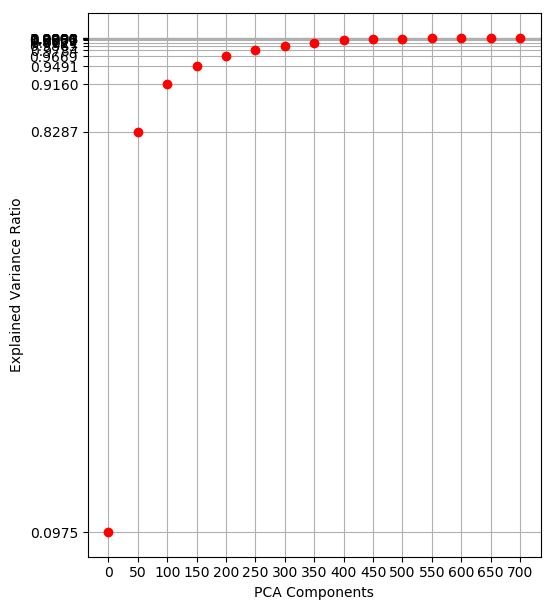

In [8]:
cumulative_variance1 = [np.sum(ratio[:i+1]) for i in range(0,ratio.shape[0],50)]
xaxis1 = [i for i in range(0,ratio.shape[0],50)]

plt.figure(figsize=(5.841, 7.195), dpi=100)

plt.plot(xaxis1,cumulative_variance1, 'ro')
plt.grid(True, which ='both')
plt.yticks(cumulative_variance1)
plt.xticks(xaxis1)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PCA Components')
plt.show()
# print(cumulative_variance1)

## 4. Visualising Data

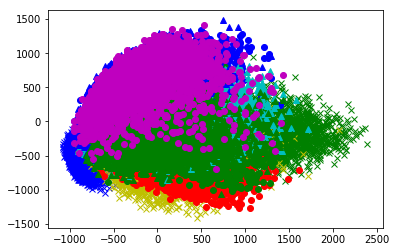

In [27]:
pca = PCA(n_components=2)
pca.fit(X_temp)
# print(sum(pca.explained_variance_ratio_))      #0.17
X_reduced = pca.fit_transform(X_temp)
y_temp = data[:,0]
# plt.figure(figsize=(8.841, 10.195), dpi=100)
symbol = ['gx','bx','yx','ro','bo','go','c^','b^','g^','mo']
for i in range(0,10):
    plt.plot(X_reduced[y_temp==i,0],X_reduced[y_temp==i,1],symbol[i])
plt.show()

## 4. Stochastic Gradient

In [195]:
import matplotlib.pyplot as plt

#Training Data
X_train1 = data[:33600, 1:]
y_train = data[:33600, 0]
variance = np.var(X_train1 , axis = 0)>0
X_train = X_train1[:, variance]

#Test Data
X_test1 = data[33600:,1:]
y_test = data[33600:, 0]
X_test = X_test1[:, variance]

#data to submit
# data_test = data_test[:, variance]

#Theta
theta = np.zeros((X_train.shape[1]+1,10)) 

#Sigma and mean of training data
sigma = np.std(X_train, axis =0)
mean = np.mean(X_train, axis =0)

#Normaization function
def normalize(X, s1, mean1):
    X = (X-mean1)/s1;
    return X

#normalizing data
X_train = normalize(X_train, sigma, mean)
X_test = normalize(X_test, sigma , mean)

#adding one
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))     #(33600, 704)
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test)) 
data_test = np.column_stack((np.ones(data_test.shape[0]), data_test))

#Score of model
def score(y_pred, y):
    print(y_pred.shape, y.shape)
    eq = (y_pred == y).astype(np.int8)
    print(np.sum(eq))
    R_2 = np.sum(eq) / y.shape
    return R_2
   
#Cost Function
def cost(X, y, theta):
    m = X.shape[0]
    J = (1/(2*m))*np.sum(np.square(np.dot(X,theta) -y))
    return J;

#Hypothesis Function
def hypothesis(x_tmp, theta1):
    h = np.dot(x_tmp, theta1)
    h = 1/(1+np.exp(-h))
    return h

#Returns predicted value of y for a given theta 
def prediction(X, theta):
        hypo = hypothesis(X, theta)
#         print(X.shape, theta.shape, hypo.shape)
        y_pred = np.argmax(hypo, axis =1)
        return y_pred

#Stochastic Gradient
J1= []
J2= []
def stochastic_gradientDescent(X, y, theta2):
    m = X.shape[0]
    alpha =0.0001
    iter = [60]
    for n in iter:
        print(n)
        for i in range(1,n):
            for k in range(0,10):
                for j in range(0,m):
                    x_tmp = X[j, :]
                    x_tmp = x_tmp.reshape(1, x_tmp.shape[0])
                    y_tmp = (y_train[j] == k).astype(np.float64)
                    theta1 = theta2[:,k].reshape(theta2[:,k].shape[0],1)
                    theta2[:,k] = (theta1 -(np.dot((alpha*x_tmp),(hypothesis(x_tmp, theta1)[0,0] - y_tmp))).T).reshape(theta1.shape[0], ) 
        
        y_pred = prediction(X_train, theta2)
        print("score2", score(y_pred,y_train))
    return theta2
        
       
        
theta = stochastic_gradientDescent(X_train, y_train, theta) 
y_pred = prediction(X_test, theta)
image_id = np.arange(1,y_pred.shape[0]+1)
# y_pred = np.column_stack((image_id, y_pred))
print("score1", score(y_pred,y_test))
np.savetxt("prediction.csv", y_pred, header='ImageId,Label', delimiter=',', fmt='%i',newline='\n', comments='')

60
(33600,) (33600,)
30891
score2 [ 0.919375]
(8400,) (8400,)
7576
score1 [ 0.90190476]


## Splitting data
    - training data : 60%
    - test data: 20%
    - cross validation data: 20%
    